In [1]:
# Step 1 --> Data Collection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Python tasks -- NETZWERK\.ipynb_checkpoints\Heartdisease.csv")

In [3]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

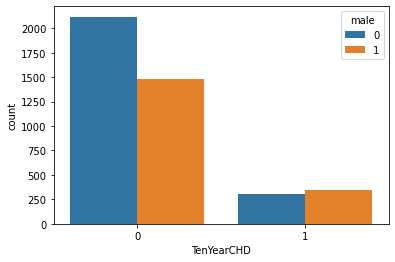

In [4]:
#Step 2--> EDA or Analyzing the data
sns.countplot(x='TenYearCHD',hue='male',data=df)
# From the graph --> men have more risk of CHD than women

<AxesSubplot:xlabel='diabetes', ylabel='count'>

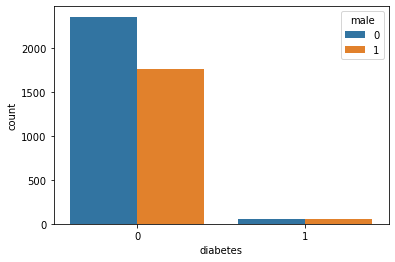

In [5]:
sns.countplot(x='diabetes',hue='male',data=df)
# more no. of womens are non-diabetic

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

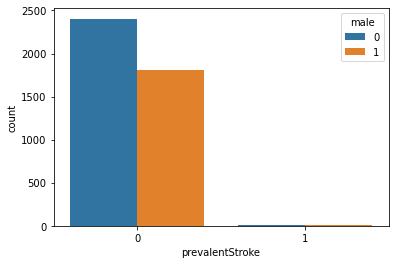

In [6]:
sns.countplot(x='prevalentStroke',hue='male',data=df)
# women have less prevalentStroke compared to men 

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

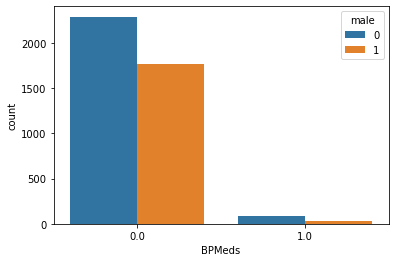

In [7]:
sns.countplot(x='BPMeds',hue='male',data=df)
# more number of female where not-under BP-Medication compared to male

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

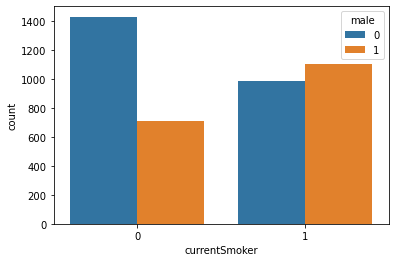

In [8]:
sns.countplot(x='currentSmoker',hue='male',data=df)
# males have more current smokers compared to female

Text(0.5, 1.0, 'Persons v/s cigsPerDay')

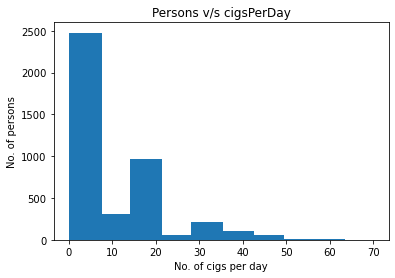

In [9]:
plt.hist('cigsPerDay',bins=10,data=df,width=7.5)
plt.xlabel('No. of cigs per day')
plt.ylabel('No. of persons')
plt.title("Persons v/s cigsPerDay")

In [10]:
#Data Wrangling
df.isna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
# education has more Nan values and since it doesn't have much effect on predicting CHD risk==> we'll drop it
df.drop('education',axis=1,inplace=True)
df.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [13]:
df.dropna(how='any',inplace=True,axis=0)

In [14]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
# splitting into X and Y
X = df.iloc[:,:-1]
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [16]:
Y = df.iloc[:,-1]
Y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3749, dtype: int64

In [17]:
X.shape

(3749, 14)

In [18]:
Y.shape

(3749,)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [20]:
X = sc.fit_transform(X)

In [21]:
X

array([[ 1.11635803, -1.2346638 , -0.97705693, ...,  0.28542409,
         0.35931906, -0.20444626],
       [-0.89576997, -0.41768745, -0.97705693, ...,  0.71835091,
         1.61390166, -0.24631379],
       [ 1.11635803, -0.18426563,  1.02348181, ..., -0.11552519,
        -0.05887514, -0.49751902],
       ...,
       [ 1.11635803,  0.04915618,  1.02348181, ...,  0.03944294,
        -0.8116247 ,  0.17236158],
       [ 1.11635803,  0.16586709,  1.02348181, ..., -1.50039906,
        -0.89526354, -0.5812541 ],
       [-0.89576997,  0.282578  , -0.97705693, ..., -1.06747224,
         0.35931906,  1.05157988]])

In [22]:
# train-test split
from sklearn.model_selection import train_test_split


In [23]:
X_tr,X_ts,Y_tr,Y_ts = train_test_split(X,Y,random_state=0,test_size=0.3)

In [24]:
# importing logistic regression tools to build the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
# training the model
model.fit(X_tr,Y_tr)

LogisticRegression()

In [26]:
# testing the model
y_pred = model.predict(X_ts)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [50]:
confusion_matrix(y_pred,Y_ts)

array([[945, 164],
       [  5,  11]], dtype=int64)

In [52]:
accuracy_score(y_pred,Y_ts)*100

84.97777777777777

In [53]:
df.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024120,0.203861,0.326780,-0.052359,-0.002509,0.002987,0.011847,-0.067506,-0.044638,0.053602,0.074630,-0.115091,0.003236,0.096056
age,-0.024120,1.000000,-0.211427,-0.188611,0.131629,0.049990,0.305735,0.109257,0.260967,0.388558,0.205774,0.136093,-0.005857,0.118426,0.231414
currentSmoker,0.203861,-0.211427,1.000000,0.773166,-0.051828,-0.037582,-0.104753,-0.045319,-0.050025,-0.133098,-0.113915,-0.165165,0.054545,-0.054180,0.021722
cigsPerDay,0.326780,-0.188611,0.773166,1.000000,-0.046601,-0.035711,-0.066911,-0.039411,-0.030427,-0.092292,-0.056108,-0.090032,0.066726,-0.055165,0.056064
BPMeds,-0.052359,0.131629,-0.051828,-0.046601,1.000000,0.111595,0.263089,0.056322,0.089554,0.269507,0.199400,0.105090,0.010232,0.052442,0.084704
prevalentStroke,-0.002509,0.049990,-0.037582,-0.035711,0.111595,1.000000,0.065208,0.009417,0.012259,0.060431,0.055232,0.035550,-0.016675,0.015779,0.047669
prevalentHyp,0.002987,0.305735,-0.104753,-0.066911,0.263089,0.065208,1.000000,0.082096,0.165049,0.697960,0.616655,0.303382,0.142512,0.085959,0.178779
diabetes,0.011847,0.109257,-0.045319,-0.039411,0.056322,0.009417,0.082096,1.000000,0.047374,0.104415,0.051841,0.093061,0.063383,0.616084,0.093190
totChol,-0.067506,0.260967,-0.050025,-0.030427,0.089554,0.012259,0.165049,0.047374,1.000000,0.216572,0.170353,0.119398,0.094802,0.046769,0.089408
sysBP,-0.044638,0.388558,-0.133098,-0.092292,0.269507,0.060431,0.697960,0.104415,0.216572,1.000000,0.785909,0.330569,0.181482,0.132928,0.220170


In [97]:
type(X_ts)

numpy.ndarray

In [98]:
X_ts.shape

(1125, 14)

In [108]:
model.predict(np.array([[0,12,0,0.0,0.0,0,0,0,150.0,106.0,70.0,20.90,80.0,100.0]]))[0]

1

In [106]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [110]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4224, 4225, 4226, 4227, 4228, 4231, 4232, 4233, 4234, 4237],
           dtype='int64', length=3749)

In [117]:
df.columns 

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [119]:
df.values

array([[  1.,  39.,   0., ...,  80.,  77.,   0.],
       [  0.,  46.,   0., ...,  95.,  76.,   0.],
       [  1.,  48.,   1., ...,  75.,  70.,   0.],
       ...,
       [  1.,  50.,   1., ...,  66.,  86.,   1.],
       [  1.,  51.,   1., ...,  65.,  68.,   0.],
       [  0.,  52.,   0., ...,  80., 107.,   0.]])

In [138]:
type(df.values)

numpy.ndarray

In [125]:
count=0
for i in df.values:
    if(i[0]==1.0 and i[14]==1.0):
        count+=1
    

In [126]:
print(count)

319


In [136]:
sum(df.male==1)

1669

In [128]:
319/1669

0.19113241461953265

In [133]:
df.shape

(3749, 15)

(array([2080.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1669.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

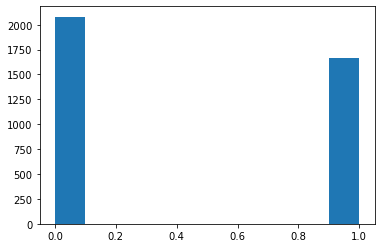

In [137]:
plt.hist(df.male,bins=10)